In [ ]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_array = np.loadtxt('/content/drive/My Drive/4BL/2kCircuit.csv', delimiter=',')

The value of the Resistor found is 2019.5163373762632


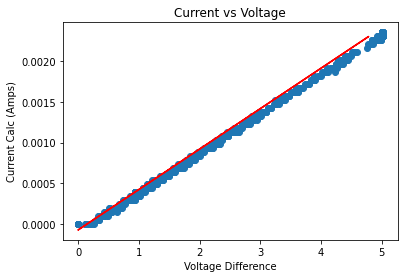

In [70]:
import matplotlib.pyplot as plt;


V1 = data_array[:,0] * (4.9 * 10**-3);
V2 = data_array[:,1] * (4.9 * 10**-3);

curr2 = V2 / 100;

deltaV = np.abs(V1 - V2);

curData = deltaV / 100;

plt.scatter(V1,curr2, label = "Current vs Voltage");
m, b = np.polyfit(deltaV, curr2, 1);
fit_line = m * deltaV + b;
plt.plot(deltaV,fit_line,label = "Line of Best Fit", color = 'red');

plt.title("Current vs Voltage")
plt.xlabel("Voltage Difference")
plt.ylabel("Current Calc (Amps)")


print("The value of the Resistor found is", 1/m);



In [98]:
def exponential(x, parameters):
  '''
  Plots a exponential
  
  Inputs:
    x: a coordinate
    parameters: [A, B]
  '''
  A = parameters[0]
  B = parameters[1]
  y = A*np.exp(B*x) 
  return y

def get_residuals(parameters, data, x):
  residuals = np.abs(data - exponential(x, parameters))
  return -residuals

Text(0, 0.5, 'Current Calc (Amps)')

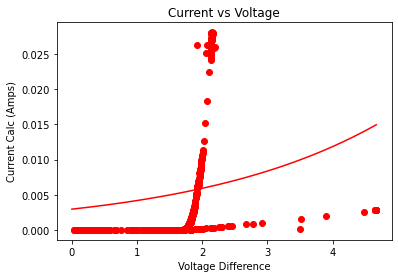

In [103]:
from scipy.optimize import least_squares
red = np.loadtxt('/content/drive/My Drive/4BL/RedLEDRetake - BlueLED - Sheet1.csv',delimiter=',')

V1r = red[:,0] * (4.9 * 10**-3);
V2r = red[:,1] * (4.9 * 10**-3);

deltaVr = np.abs(V1r - V2r);

curDatar = truVoltr / 100;

currR = V2r /100;


plt.scatter(V1r-V2r,currR, label = "Red LED", color = "red");
mr, br = np.polyfit(deltaVr, currR, 1);
#fit_liner = mr * deltaVr + br;
#plt.plot(deltaVr,fit_liner,label = "Line of Best Fit", color = 'red');

# fit Line
guess_param = [0.000005, 0.0035]
red_x = np.linspace(0, np.max(V1r-V2r), len(V2r))
res_lsq = least_squares(get_residuals, guess_param, args = (currR, V1r-V2r))
parameters = res_lsq['x']
red_fit = exponential(red_x, parameters)
plt.plot(red_x, red_fit, color = 'red')

plt.title("Current vs Voltage")
plt.xlabel("Voltage Difference")
plt.ylabel("Current Calc (Amps)")


#print("The slope of best fit is ", 1/mr);

The slope of best fit is  451.3389191077684


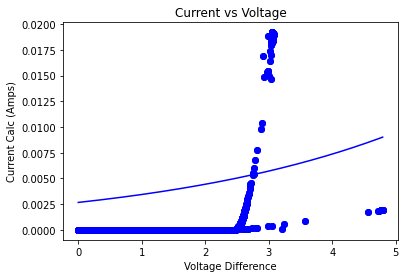

In [101]:
blue = np.loadtxt('/content/drive/My Drive/4BL/BlueLED - Sheet1 - BlueLED - Sheet1.csv', delimiter= ',')

V1b = blue[:,0] * (4.9 * 10**-3);
V2b = blue[:,1] * (4.9 * 10**-3);

deltaVb = np.abs(V1b - V2b);

curDatab = truVoltb / 100;

currb = V2b /100;


plt.scatter(V1b-V2b,currb, label = "Red LED", color = "blue");


plt.scatter(V1b-V2b,currb, label = "Red LED", color = "blue");
mb, bb = np.polyfit(deltaVb, currb, 1);
#fit_liner = mr * deltaVr + br;
#plt.plot(deltaVr,fit_liner,label = "Line of Best Fit", color = 'red');

# fit Line
guess_param = [0.000005, 0.0035]
blue_x = np.linspace(0, np.max(V1b-V2b), len(V2b))
res_lsq = least_squares(get_residuals, guess_param, args = (currb, V1b-V2b))
parameters = res_lsq['x']
blue_fit = exponential(blue_x, parameters)
plt.plot(blue_x, blue_fit, color = 'blue')

plt.title("Current vs Voltage")
plt.xlabel("Voltage Difference")
plt.ylabel("Current Calc (Amps)")




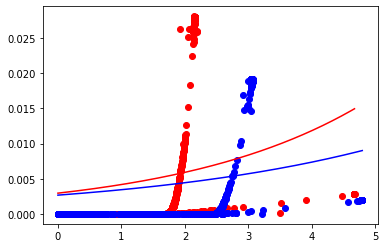

In [104]:
plt.scatter(V1r-V2r,currR, label = "Red LED", color = "red");
plt.scatter(V1b-V2b,currb, label = "Red LED", color = "blue");

plt.plot(blue_x, blue_fit, color = 'blue')
plt.plot(red_x, red_fit, color = 'red')
